In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from analysing_entanglement import analysing_entanglement_obj
from numpy_helpers import *
import math

path_to_pickles = "/space/ge65kox/BA/pickles/"

obj = pickle.load(open(path_to_pickles+"ana_ent_objs_200_4050.pkl","rb"))

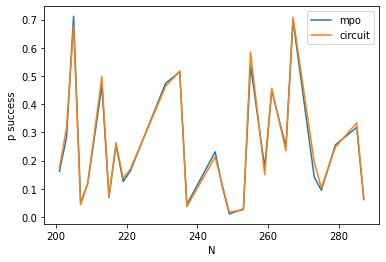

In [71]:
# Load the data
p_success_fourier_mpo = np.array([obj[i].p_success_fourier_mpo for i in range(len(obj))])
p_success_fourier_circuit = np.array([obj[i].p_success_fourier_circuit for i in range(len(obj))])
N = np.array([obj[i].N for i in range(len(obj))])

# Plot the data
plt.plot(N,p_success_fourier_mpo,label="mpo")
plt.plot(N,p_success_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("p success")
plt.legend()
plt.show()

In [72]:
#get maximum_entanglement_entropy
def get_max_entanglement_entropy(entanglement_entropy):
    return np.max(entanglement_entropy)

def get_max_bond_dimension(schmidt_values):
    l = [len(s) for s in schmidt_values]
    return np.max(l) 

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


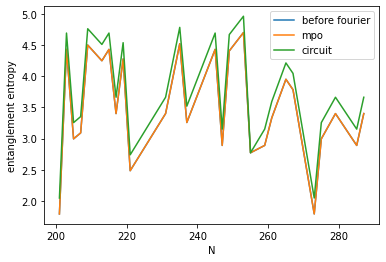

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


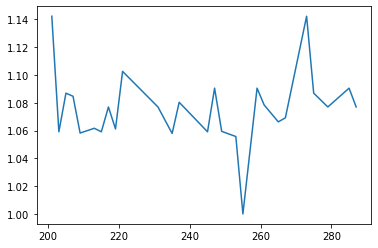

In [78]:
#Get the data
entanglement_entropy_before_fourier = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_before_fourier) for i in range(len(obj))])
entanglement_entropy_fourier_mpo = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_mpo) for i in range(len(obj))])
entanglement_entropy_fourier_circuit = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_circuit) for i in range(len(obj))])

#Plot the data
plt.plot(N,entanglement_entropy_before_fourier,label="before fourier")
plt.plot(N,entanglement_entropy_fourier_mpo,label="mpo")
plt.plot(N,entanglement_entropy_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("entanglement entropy")
plt.legend()
plt.show()


plt.plot(N,entanglement_entropy_fourier_circuit/entanglement_entropy_fourier_mpo,label="circuit")


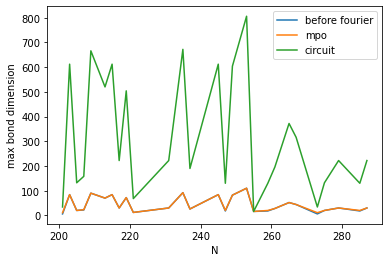

In [74]:
#Get the data
max_bond_dim_before_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_before_fourier) for i in range(len(obj))])
max_bond_dim_fourier_mpo = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_mpo) for i in range(len(obj))])
max_bond_dim_fourier_circuit = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_circuit) for i in range(len(obj))])

#Plot the data
plt.plot(N,max_bond_dim_before_fourier,label="before fourier")
plt.plot(N,max_bond_dim_fourier_mpo,label="mpo")
plt.plot(N,max_bond_dim_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("max bond dimension")
plt.legend()
plt.show()


In [77]:
#get number of prime factors
def calculate_prime_factors(N):
    prime_factors = []
    while N % 2 == 0:
        N = N // 2
        prime_factors.append(2)
        if N == 1:
            return prime_factors
    for factor in range(3, N + 1, 2):
        while N % factor == 0:
            N = N // factor
            prime_factors.append(factor)
            if N == 1:
                return prime_factors

n_divided_anzahl_prime_factors = np.array([math.log(N[i])/len(calculate_prime_factors(N[i])) for i in range(len(N))])
print(n_divided_anzahl_prime_factors)

[2.65165245 2.65660299 2.66150499 1.77757293 2.67116713 2.68064608
 2.68531901 2.68994868 2.69453586 2.69908135 1.81413924 2.72979276
 2.73403007 1.83375274 2.75469417 2.75872645 2.76669474 1.84708785
 2.77841403 1.85484014 2.78986491 2.79362433 1.86982393 1.87225703
 1.87707059 1.88416306 2.82974111]


/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


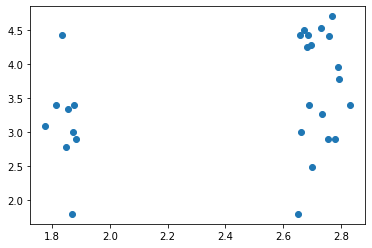

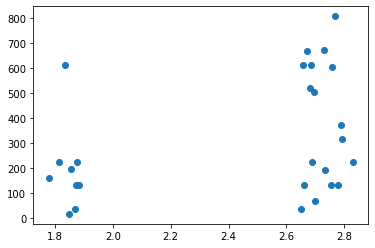

In [76]:
plt.scatter(n_divided_anzahl_prime_factors,entanglement_entropy_fourier_mpo,label="mpo")
plt.show()


plt.scatter(n_divided_anzahl_prime_factors,max_bond_dim_fourier_circuit,label="circuit")